### **Contents:** 
1. Business Problem
2. Data Understanding
3. Exploratory Data Analysis
5. Data Preprocessing
1. Modeling and Evaluation
1. Final Model Interpretation
8. Conclusion and Recommendation
7. Deployment

-----
____

### **Import Libraries**

In [289]:
# base library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# train test split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# preprocessing
from feature_engine.encoding import RareLabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# evaluation and interpretation
import time
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import shap

import pickle
import warnings
warnings.filterwarnings('ignore')

## **2. Data Understanding**
---

For this project, we use a dataset that describing Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'. (source : https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)

In [290]:
# read dataset in csv
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [291]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### **Dataset Dictionary :**

| No. | Feature Name |  Description	|
| --- | --- | ---	|
| 1. | age |  client's age	|
| 2. | job |  client's job |
| 3. | marital | client's marital status |
| 4. | education | client's education |
| 5. | default |  has credit in default?	|
| 6. | housing |  has housing loan?	|
| 7. | loan | has personal loan?	|
| 8. | contact |  contact communication type	|
| 9. | day_of_week |  last contact day of the week	|
| 10. | month |  last contact month of year |
| 11. | duration |  last contact duration, in seconds |
| 12. | campaign |  number of contacts performed during this campaign and for this client |
| 13. | pdays |  number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| 14. | previous |  number of contacts performed before this campaign and for this client	|
| 15. | poutcome |  outcome of the previous marketing campaign	|
| 16. | emp.var.rate |  employment variation rate (quarterly indicator) |
| 17. | cons.price.idx |  consumer price index (monthly indicator)	|
| 18. | cons.conf.idx |  consumer confidence index (monthly indicator)	|
| 19. | euribor3m |  euribor 3 month rate (daily indicator)	|
| 20. | nr.employed |  number of employees (quarterly indicator)	|
| 21. | y |  has the client subscribed a term deposit?	|

### **2.1 Check Duplicate Data :**

In [292]:
# check duplicate data

print("Total of duplicated data is", df.duplicated().sum())
pct_duplicated = (df.duplicated().sum() / len(df) * 100).round(2)
print("The percentage of duplicated data is", pct_duplicated,'%')

Total of duplicated data is 12
The percentage of duplicated data is 0.03 %


In [293]:
df[df.duplicated(keep='first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate data in the dataset and the percentage of duplicate data is 0.03%. Duplicate data in machine learning datasets can cause bias and overfitting because the same data points are calculated several times. Therefore we will **remove the duplicate data**.

In [294]:
# drop duplicated rows

df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [295]:
# check unique value in each column
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'feature':df.columns.values,
    'n_unique':df.nunique().values,
    'unique_values':[df[i].unique() for i in df.columns]
})

,feature,n_unique,unique_values
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


#### Notes :
1. The dataset contains 41,176 entries and 21 columns after removing 12 duplicate data.
2. Column renaming are recommended for better comprehension by the stackholders.
5. This dataset has no missing values (null values) but there are data labeled 'unknown' in column `marital`, `default`, `housing`, and `loan`.

### **2.2 Data Descriptive Summary :**

In [296]:
# descriptive statistics for numerical data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [297]:
# descriptive statistics for categorical data
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


#### Notes :
- Most clients have no previous campaign contact.
- Most bank's clients is married, with university degree, work in administration, and has no housing or personal loan.
- Majority of clients have nonexistent outcome from previous campaign and not subscribed term deposit.

## **3. Exploratory Data Analysis**
---

In [298]:
# define variabel to store numerical column
numerical_cols = df.select_dtypes(include=['int','float64']).columns[:].tolist()
# define variabel to store categorical column
categorical_cols = df.select_dtypes(include=['object']).columns[:].tolist()

### **3.1 Subscribe Term Deposit Analysis (Target Analysis)**

In [299]:
# calculate client data who subscribe and not subscribe
target = df['y'].value_counts()

# calculate percentage subscribe and not subscribe term deposit
percent = (target.values*100/df['y'].count()).round(2)

In [300]:
target_df = pd.DataFrame({
    'Target':target.index,
    'Count':target.values,
    '%':percent
}).reset_index(drop=True)
target_df

,Target,Count,%
0,no,36537,88.73
1,yes,4639,11.27


This dataset have : 
- 88.74% client not subscribe term deposit 
- 11.27% client subscribe term deposit

With only 11.27% of clients subscribe term deposit, there's significant room for improvement. This aligns well with our project goal of increasing the conversion rate.

### **3.2 Categorical Features**

### Frequency of Categorical Column

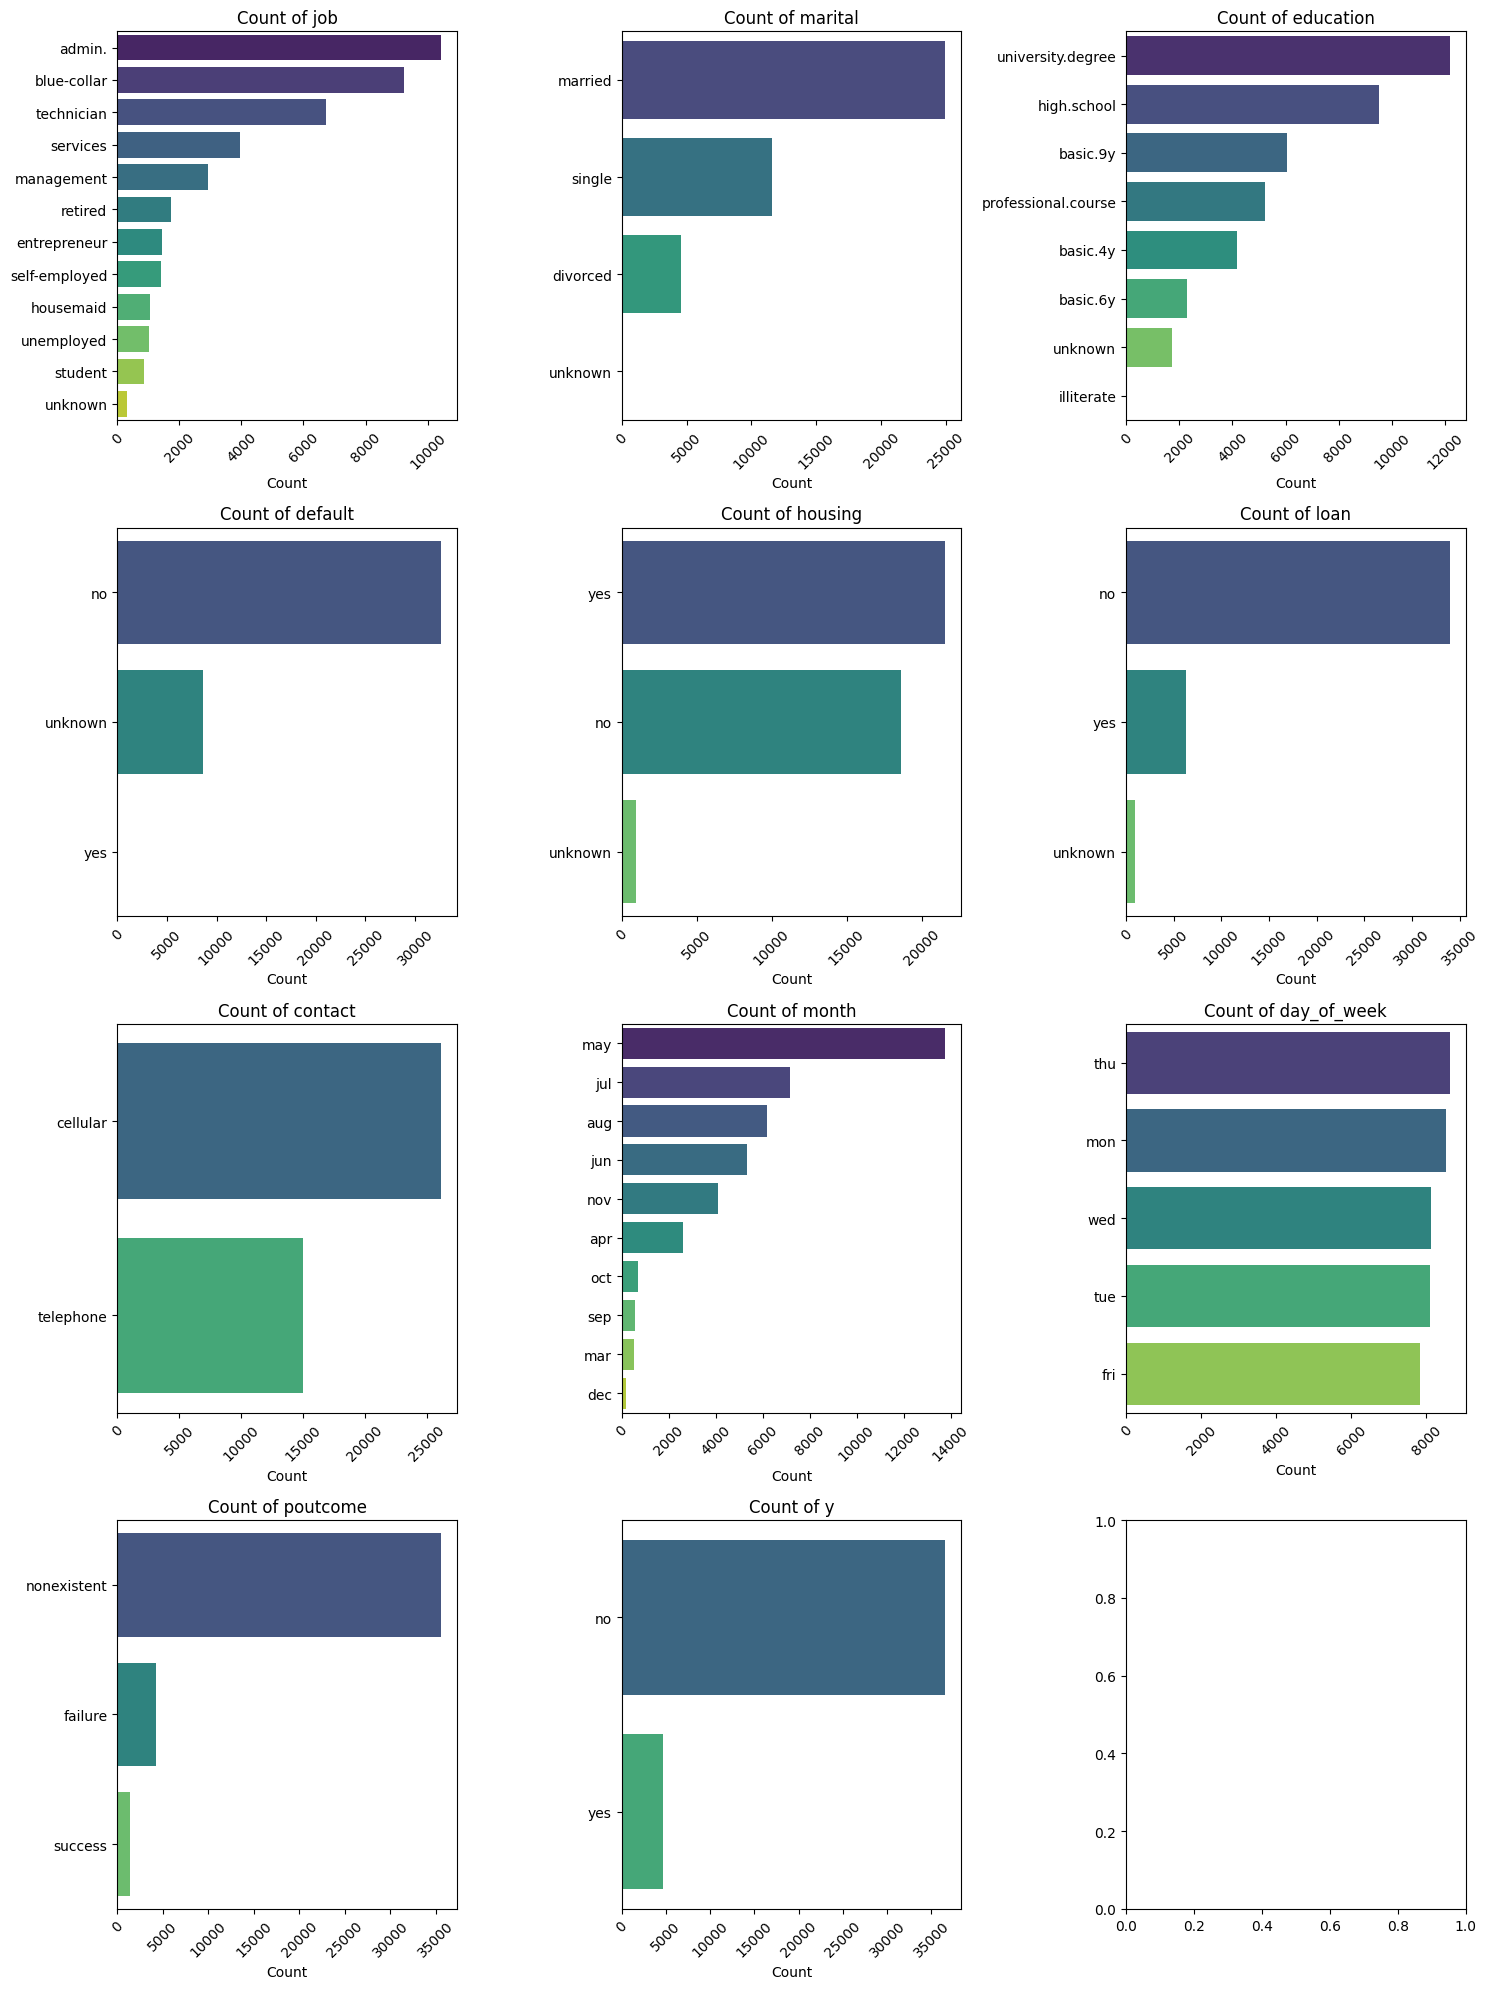

In [301]:
# create subplot
num_plots = len(categorical_cols)
num_cols = 3  # number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # number of rows in subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# flatten axes array to easily iterate over it
axes = axes.flatten()

# create a count plot
for i, column in enumerate(categorical_cols):
    sns.countplot(data=df, y=column, palette='viridis', ax=axes[i], order=df[column].value_counts().index)
    axes[i].set_title(f'Count of {column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# display the plots
plt.tight_layout()
plt.show()

### Feature Job

In [302]:
# calculate data per client's job
job = df['job'].value_counts()

# calculate percentage per client's job resulted in subscribe and not subscribe term deposit
job_y_no = ((df[df['y']=='no']['job'].value_counts())*100/job).reindex(job.index).round(2)
job_y_yes = ((df[df['y']=='yes']['job'].value_counts())*100/job).reindex(job.index).round(2)

In [303]:
job_df = pd.DataFrame({
    'Job':job.index,
    'Count':job.values,
    '%y_no':job_y_no,
    '%y_yes':job_y_yes
}).reset_index(drop=True)
job_df

,Job,Count,%y_no,%y_yes
0,admin.,10419,87.03,12.97
1,blue-collar,9253,93.10,6.90
2,technician,6739,89.17,10.83
3,services,3967,91.86,8.14
4,management,2924,88.78,11.22
5,retired,1718,74.74,25.26
6,entrepreneur,1456,91.48,8.52
7,self-employed,1421,89.51,10.49
8,housemaid,1060,90.00,10.00
9,unemployed,1014,85.80,14.20


In [304]:
# groupby data by 'job' and 'y'
job_analysis = df.groupby(by=['job','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

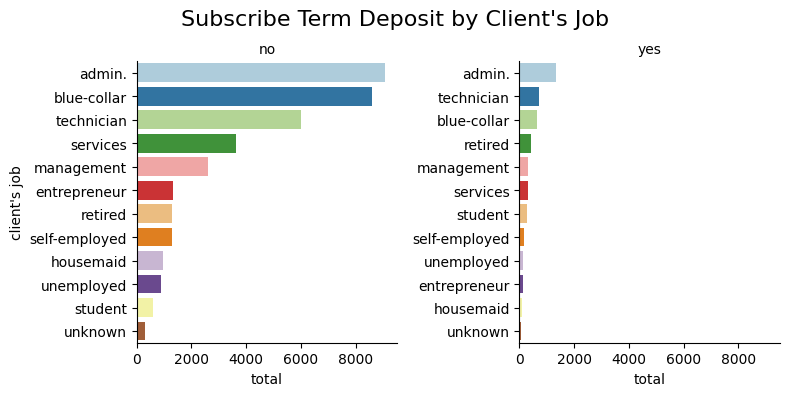

In [305]:
# visualize data deposit by client's job
viz = sns.FacetGrid(job_analysis, col='y', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='job', palette='Paired', errorbar=None)
viz.set_axis_labels('total', "client's job")
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Job", fontsize=16)
plt.show()

Most of clients work as admins, blue-collar workers, and technicians so it's also have highest proportion in both subscribe and not subscribe term deposit. Additionally, retired clients and students have high interest in term deposit.

### Feature Marital

In [306]:
# calculate data per client's marital status
marital = df['marital'].value_counts()

# calculate percentage per client's marital status resulted in subscribe and not subscribe term deposit
marital_y_no = ((df[df['y']=='no']['marital'].value_counts())*100/marital).reindex(marital.index).round(2)
marital_y_yes = ((df[df['y']=='yes']['marital'].value_counts())*100/marital).reindex(marital.index).round(2)

In [307]:
marital_df = pd.DataFrame({
    'Status':marital.index,
    'Count':marital.values,
    '%y_no':marital_y_no,
    '%y_yes':marital_y_yes
}).reset_index(drop=True)
marital_df

,Status,Count,%y_no,%y_yes
0,married,24921,89.84,10.16
1,single,11564,85.99,14.01
2,divorced,4611,89.68,10.32
3,unknown,80,85.00,15.00


In [308]:
# groupby data by 'marital' and 'y'
marital_analysis = df.groupby(by=['marital','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

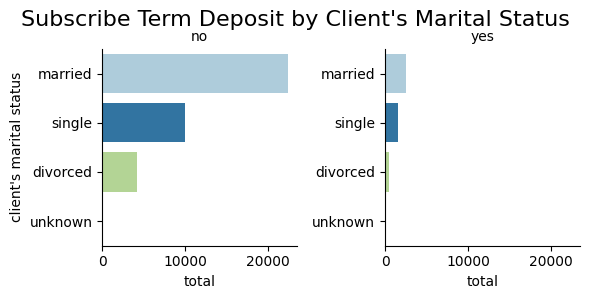

In [309]:
# visualize data deposit by client's marital status
viz = sns.FacetGrid(marital_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='marital', palette='Paired', errorbar=None)
viz.set_axis_labels('total', "client's marital status")
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Marital Status", fontsize=16)
plt.show()

Majority of client's marital statuses are married and it's also have highest proportion in both subscribe and not subscribe term deposit followed by single status and divorced.

### Feature Education

In [310]:
# calculate data per client's education
education = df['education'].value_counts()

# calculate percentage per client's education resulted in subscribe and not subscribe term deposit
edu_y_no = ((df[df['y']=='no']['education'].value_counts())*100/education).reindex(education.index).round(2)
edu_y_yes = ((df[df['y']=='yes']['education'].value_counts())*100/education).reindex(education.index).round(2)

In [311]:
edu_df = pd.DataFrame({
    'Education':education.index,
    'Count':education.values,
    '%y_no':edu_y_no,
    '%y_yes':edu_y_yes
}).reset_index(drop=True)
edu_df

,Education,Count,%y_no,%y_yes
0,university.degree,12164,86.28,13.72
1,high.school,9512,89.16,10.84
2,basic.9y,6045,92.18,7.82
3,professional.course,5240,88.65,11.35
4,basic.4y,4176,89.75,10.25
5,basic.6y,2291,91.79,8.21
6,unknown,1730,85.49,14.51
7,illiterate,18,77.78,22.22


In [312]:
# groupby data by 'education' and 'y'
education_analysis = df.groupby(by=['education','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

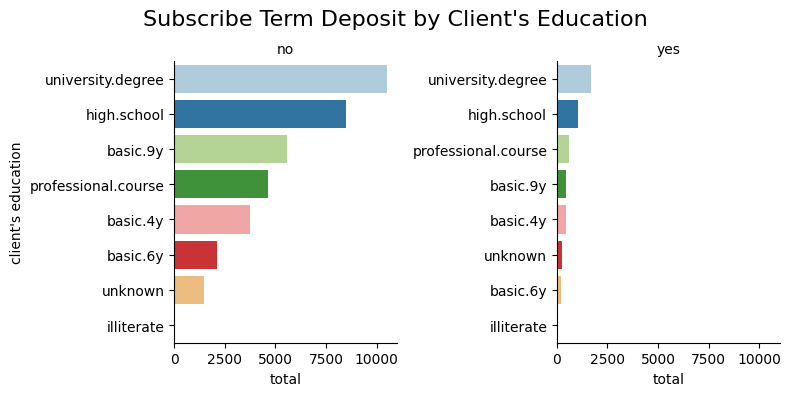

In [313]:
# visualize data deposit by client's education
viz = sns.FacetGrid(education_analysis, col='y', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='education', palette='Paired', errorbar=None)
viz.set_axis_labels('total', "client's education")
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Education", fontsize=16)
plt.show()

We can see majority of client's education are university degree, high school, basic 9y, and professional course, it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Default

In [314]:
# calculate data per client's credit default
default = df['default'].value_counts()

# calculate percentage per client's credit default resulted in subscribe and not subscribe term deposit
default_y_no = ((df[df['y']=='no']['default'].value_counts())*100/default).reindex(default.index).round(2)
default_y_yes = ((df[df['y']=='yes']['default'].value_counts())*100/default).reindex(default.index).round(2)

In [315]:
default_df = pd.DataFrame({
    'Credit Default':default.index,
    'Count':default.values,
    '%y_no':default_y_no,
    '%y_yes':default_y_yes
}).reset_index(drop=True)
default_df

,Credit Default,Count,%y_no,%y_yes
0,no,32577,87.12,12.88
1,unknown,8596,94.85,5.15
2,yes,3,100.00,NaN


In [316]:
# groupby data by 'default' and 'y'
default_analysis = df.groupby(by=['default','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

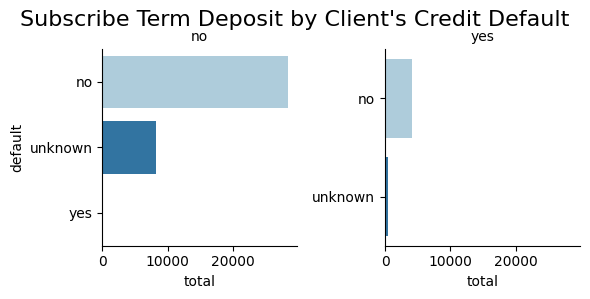

In [317]:
# visualize data deposit by client's education
viz = sns.FacetGrid(default_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='default', palette='Paired', errorbar=None)
viz.set_axis_labels('total', 'default')
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Credit Default", fontsize=16)
plt.show()

Majority of clients have no credit defaults and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Housing

In [318]:
# calculate data per client's housing loan
housing = df['housing'].value_counts()

# calculate percentage per client's housing loan resulted in subscribe and not subscribe term deposit
housing_y_no = ((df[df['y']=='no']['housing'].value_counts())*100/housing).reindex(housing.index).round(2)
housing_y_yes = ((df[df['y']=='yes']['housing'].value_counts())*100/housing).reindex(housing.index).round(2)

In [319]:
housing_df = pd.DataFrame({
    'Housing Loan':housing.index,
    'Count':housing.values,
    '%y_no':housing_y_no,
    '%y_yes':housing_y_yes
}).reset_index(drop=True)
housing_df

,Housing Loan,Count,%y_no,%y_yes
0,yes,21571,88.38,11.62
1,no,18615,89.12,10.88
2,unknown,990,89.19,10.81


In [320]:
# groupby data by 'housing' and 'y'
housing_analysis = df.groupby(by=['housing','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

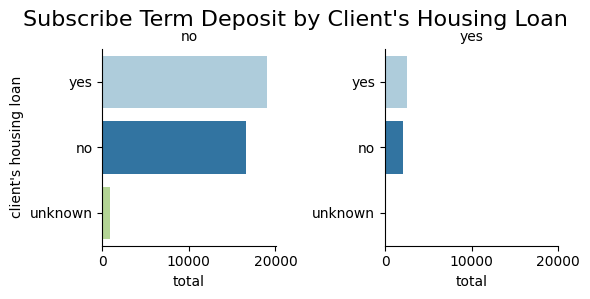

In [321]:
# visualize data deposit by housing loan
viz = sns.FacetGrid(housing_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='housing', palette='Paired', errorbar=None)
viz.set_axis_labels('total', "client's housing loan")
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Housing Loan", fontsize=16)
plt.show()

Majority of client have housing loan and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Loan

In [322]:
# calculate data per client's personal loan
loan = df['loan'].value_counts()

# calculate percentage per client's personal loan resulted in subscribe and not subscribe term deposit
loan_y_no = ((df[df['y']=='no']['loan'].value_counts())*100/loan).reindex(loan.index).round(2)
loan_y_yes = ((df[df['y']=='yes']['loan'].value_counts())*100/loan).reindex(loan.index).round(2)

In [323]:
loan_df = pd.DataFrame({
    'Personal Loan':loan.index,
    'Count':loan.values,
    '%y_no':loan_y_no,
    '%y_yes':loan_y_yes
}).reset_index(drop=True)
loan_df

,Personal Loan,Count,%y_no,%y_yes
0,no,33938,88.66,11.34
1,yes,6248,89.07,10.93
2,unknown,990,89.19,10.81


In [324]:
# groupby data by 'loan' and 'y'
loan_analysis = df.groupby(by=['loan','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

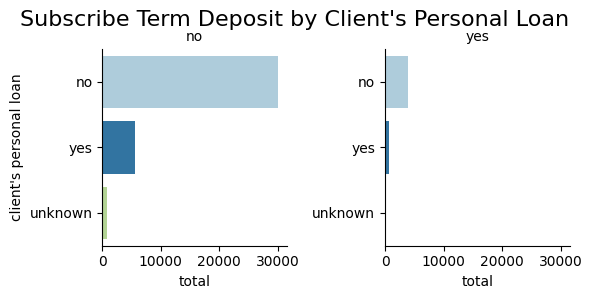

In [325]:
# visualize data deposit by personal loan
viz = sns.FacetGrid(loan_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='loan', palette='Paired', errorbar=None)
viz.set_axis_labels('total', "client's personal loan")
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle("Subscribe Term Deposit by Client's Personal Loan", fontsize=16)
plt.show()

Majority of clients have no personal loan and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Contact

In [326]:
# calculate data by contact type
contact = df['contact'].value_counts()

# calculate percentage by contact type resulted in subscribe and not subscribe term deposit
contact_y_no = ((df[df['y']=='no']['contact'].value_counts())*100/contact).reindex(contact.index).round(2)
contact_y_yes = ((df[df['y']=='yes']['contact'].value_counts())*100/contact).reindex(contact.index).round(2)

In [327]:
contact_df = pd.DataFrame({
    'Contact Type':contact.index,
    'Count':contact.values,
    '%y_no':contact_y_no,
    '%y_yes':contact_y_yes
}).reset_index(drop=True)
contact_df

,Contact Type,Count,%y_no,%y_yes
0,cellular,26135,85.26,14.74
1,telephone,15041,94.77,5.23


In [328]:
# groupby data by 'contact' and 'y'
contact_analysis = df.groupby(by=['contact','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

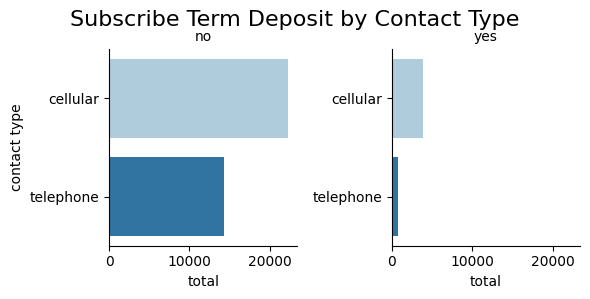

In [329]:
# visualize data deposit by contact communication type
viz = sns.FacetGrid(contact_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='contact', palette='Paired', errorbar=None)
viz.set_axis_labels('total', 'contact type')
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Contact Type', fontsize=16)
plt.show()

Majority of clients are contacted by cellular and it's also have highest proportion in both subscribe and not subscribe term deposit.

### Feature Month

In [330]:
# calculate data by last contact month
month = df['month'].value_counts()

# calculate percentage by last contact month resulted in subscribe and not subscribe term deposit
month_y_no = ((df[df['y']=='no']['month'].value_counts())*100/month).reindex(month.index).round(2)
month_y_yes = ((df[df['y']=='yes']['month'].value_counts())*100/month).reindex(month.index).round(2)

In [331]:
month_df = pd.DataFrame({
    'Contact Month':month.index,
    'Count':month.values,
    '%y_no':month_y_no,
    '%y_yes':month_y_yes
}).reset_index(drop=True)
month_df

,Contact Month,Count,%y_no,%y_yes
0,may,13767,93.56,6.44
1,jul,7169,90.96,9.04
2,aug,6176,89.39,10.61
3,jun,5318,89.49,10.51
4,nov,4100,89.85,10.15
5,apr,2631,79.51,20.49
6,oct,717,56.07,43.93
7,sep,570,55.09,44.91
8,mar,546,49.45,50.55
9,dec,182,51.10,48.90


In [332]:
# groupby data by 'month' and 'y'
month_analysis = df.groupby(by=['month','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

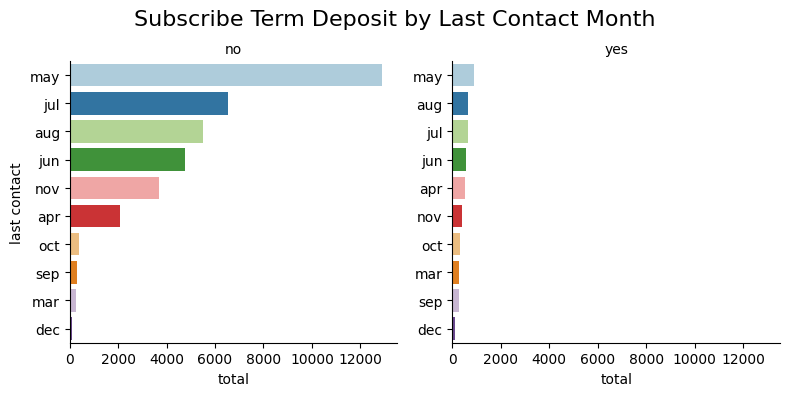

In [333]:
# visualize data deposit by last contact month
viz = sns.FacetGrid(month_analysis, col='y', col_wrap=2, height=4, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='month', palette='Paired', errorbar=None)
viz.set_axis_labels('total', 'last contact')
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Last Contact Month', fontsize=16)
plt.show()

Most of clients are contacted in May, July, and August but percentage of client who subscribe term deposit is higher when contacted in April, Oct, Sep, March, December.

### Feature day_of_week

In [334]:
# calculate data by last contact day
day = df['day_of_week'].value_counts()

# calculate percentage by last contact day resulted in subscribe and not subscribe term deposit
day_y_no = ((df[df['y']=='no']['day_of_week'].value_counts())*100/day).reindex(day.index).round(2)
day_y_yes = ((df[df['y']=='yes']['day_of_week'].value_counts())*100/day).reindex(day.index).round(2)

In [335]:
day_df = pd.DataFrame({
    'Contact Day':day.index,
    'Count':day.values,
    '%y_no':day_y_no,
    '%y_yes':day_y_yes
}).reset_index(drop=True)
day_df

,Contact Day,Count,%y_no,%y_yes
0,thu,8618,87.89,12.11
1,mon,8512,90.05,9.95
2,wed,8134,88.33,11.67
3,tue,8086,88.21,11.79
4,fri,7826,89.19,10.81


In [336]:
# groupby data by 'day_of_week' and 'y'
day_analysis = df.groupby(by=['day_of_week','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

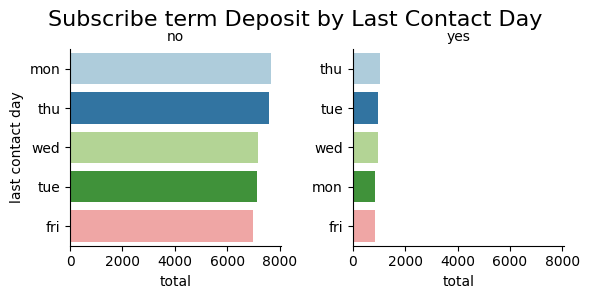

In [337]:
# visualize data deposit by last contact day of week
viz = sns.FacetGrid(day_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='day_of_week', palette='Paired', errorbar=None)
viz.set_axis_labels('total', 'last contact day')
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe term Deposit by Last Contact Day', fontsize=16)
plt.show()

From the data above, we can conclude this column not significantly affect the subscribe term deposit decision.

### Feature Poutcome

In [338]:
# calculate data by previous outcome
pout = df['poutcome'].value_counts()

# calculate percentage by previous outcome resulted in subscribe and not subscribe term deposit
pout_y_no = ((df[df['y']=='no']['poutcome'].value_counts())*100/pout).reindex(pout.index).round(2)
pout_y_yes = ((df[df['y']=='yes']['poutcome'].value_counts())*100/pout).reindex(pout.index).round(2)

In [339]:
pout_df = pd.DataFrame({
    'Previous Outcome':pout.index,
    'Count':pout.values,
    '%y_no':pout_y_no,
    '%y_yes':pout_y_yes
}).reset_index(drop=True)
pout_df

,Previous Outcome,Count,%y_no,%y_yes
0,nonexistent,35551,91.17,8.83
1,failure,4252,85.77,14.23
2,success,1373,34.89,65.11


In [340]:
# groupby data by 'poutcome' and 'y'
poutcome_analysis = df.groupby(by=['poutcome','y']).agg({'age':'count'}).rename(columns={'age':'total'}).sort_values(by='total',ascending=False).reset_index()

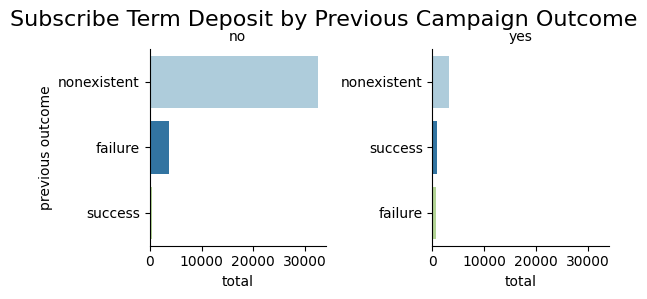

In [341]:
# visualize data deposit by previous campaign outcome
viz = sns.FacetGrid(poutcome_analysis, col='y', col_wrap=2, height=3, sharey=False)
viz.map_dataframe(sns.barplot, x='total', y='poutcome', palette='Paired', errorbar=None)
viz.set_axis_labels('total', 'previous outcome')
viz.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.85)
plt.suptitle('Subscribe Term Deposit by Previous Campaign Outcome', fontsize=16)
plt.show()

Majority of clients have nonexistent outcome from previous campaign and it's also have highest proportion in both subscribe and not subscribe term deposit. Client with previous outcome success tend to have high interest to subscribe term deposit.

### **3.3 Numerical Features**

### **3.3.1 Data Distribution and Outlier**

#### Data distribution and identify outlier using boxplot

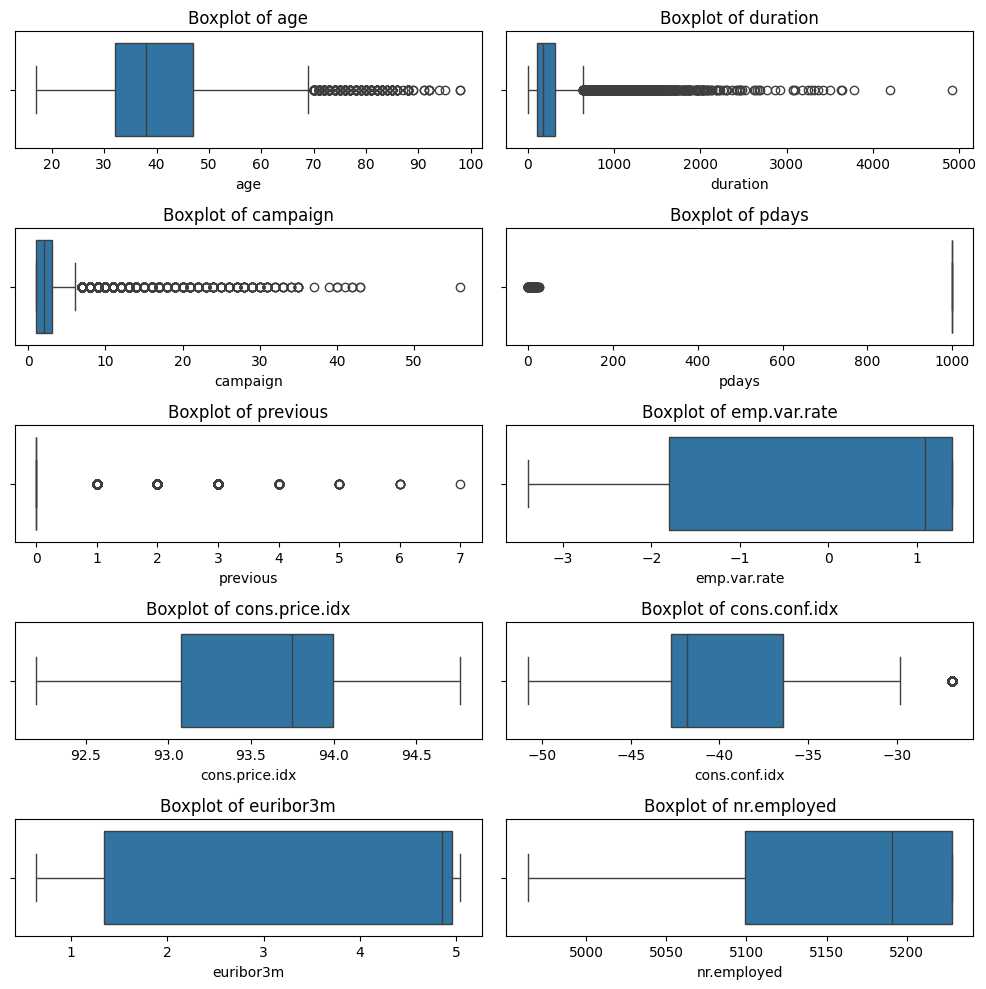

In [342]:
fig,axes = plt.subplots(5,2,figsize=(10,10))

for i, cols in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[cols], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

#### Data Distribution using Statistics Calculation

In [343]:
# define alpha value
alpha = 0.05
index = 1

dist_info = []
for col in numerical_cols:
    stat, p_value = normaltest(df[col].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([col, stat, p_value, distribution, skewness, skewness_type])

# make dataframe from the results
distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,age,3902.597860,0.000000e+00,Not Normally Distributed,0.784560,Right Skew
1,duration,30123.089728,0.000000e+00,Not Normally Distributed,3.262808,Right Skew
2,campaign,40265.411165,0.000000e+00,Not Normally Distributed,4.762044,Right Skew
3,pdays,38964.758503,0.000000e+00,Not Normally Distributed,-4.921386,Left Skew
4,previous,33207.043562,0.000000e+00,Not Normally Distributed,3.831396,Right Skew
5,emp.var.rate,16401.949326,0.000000e+00,Not Normally Distributed,-0.724061,Left Skew
6,cons.price.idx,4389.922137,0.000000e+00,Not Normally Distributed,-0.230853,Left Skew
7,cons.conf.idx,936.177890,5.147000e-204,Not Normally Distributed,0.302876,Right Skew
8,euribor3m,366903.100925,0.000000e+00,Not Normally Distributed,-0.709194,Left Skew
9,nr.employed,5197.379117,0.000000e+00,Not Normally Distributed,-1.044317,Left Skew


The boxplot diagram and statistics calculation indicates that the numerical data in the dataframe not normally distributed. Additionally, some columns have outliers, so we need to calculate the IQR (Interquartile Range) get the number of outliers.

#### IQR (Interquartile Range)

In [344]:
# define function to calculate IQR and outlier
def IQR_outlier(data, col):
    Q1 = data[col].quantile(1/4)
    Q3 = data[col].quantile(3/4)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[col] < outlier_lower) | (data[col] > outlier_upper)])
    outlier_percentage = round(total_outliers / len(data[col]) * 100, 2)
    return outlier_lower, outlier_upper, total_outliers, outlier_percentage

In [345]:
# define an empty list to store function result
outlier = []
for col in numerical_cols:
    lower_band, upper_band, total_outliers, outlier_percentage = IQR_outlier(df, col)
    outlier.append([col, lower_band, upper_band, total_outliers, outlier_percentage])

In [346]:
# turn the outlier list into a dataframe
outlier_info_df = pd.DataFrame(outlier, columns=["Columns", "Lower Band", "Upper Band", "Total Outliers", "Percentage of Outliers (%)"])
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,age,9.5000,69.5000,468,1.14
1,duration,-223.5000,644.5000,2963,7.20
2,campaign,-2.0000,6.0000,2406,5.84
3,pdays,999.0000,999.0000,1515,3.68
4,previous,0.0000,0.0000,5625,13.66
5,emp.var.rate,-6.6000,6.2000,0,0.00
6,cons.price.idx,91.6965,95.3725,0,0.00
7,cons.conf.idx,-52.1500,-26.9500,446,1.08
8,euribor3m,-4.0815,10.3865,0,0.00
9,nr.employed,4905.6000,5421.6000,0,0.00


There are 5 numerical column that have outliers below 10% and 1 column with outlier over 10%. We will analyze further for this outliers.

### Feature Age Outliers

In [347]:
display(df[df['age']> 69.5].describe(), df[df['age']> 69.5].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,76.940171,274.025641,1.942308,790.944444,0.683761,-2.362607,93.116782,-36.471368,0.903261,5030.506624
std,5.759700,231.273366,1.651320,404.700896,0.974181,0.803706,0.765522,7.236151,0.277602,42.747779
min,70.000000,1.000000,1.000000,2.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,72.000000,134.000000,1.000000,999.000000,0.000000,-3.400000,92.431000,-40.300000,0.718000,5008.700000
50%,76.000000,209.500000,1.000000,999.000000,0.000000,-1.800000,92.843000,-34.600000,0.822000,5017.500000
75%,81.000000,331.000000,2.000000,999.000000,1.000000,-1.800000,93.876000,-30.100000,0.899000,5076.200000
max,98.000000,2055.000000,16.000000,999.000000,6.000000,-1.100000,94.767000,-26.900000,1.811000,5099.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,468,468,468,468,468,468,468,468,468,468,468
unique,8,3,8,2,3,3,2,10,5,3,2
top,retired,married,basic.4y,no,yes,no,cellular,aug,tue,nonexistent,no
freq,418,318,241,425,257,389,420,87,109,266,247


This data became outlier because majority of client's age are between 30-40 years old, but it is possible to have age range 70 - 98 years old and most clients are retired but not subscribe term deposit so **we will retain this data**.

### Feature Duration Outliers

In [348]:
display(df[df['duration']> 644.5].describe(),df[df['duration']> 644.5].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,39.695579,968.217010,2.466757,951.430307,0.170098,0.082889,93.593624,-40.785251,3.602532,5165.822106
std,10.364156,367.294817,2.186562,212.062901,0.499923,1.560541,0.566724,4.567917,1.744140,74.418556
min,17.000000,645.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.636000,4963.600000
25%,32.000000,729.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,854.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.857000,5191.000000
75%,47.000000,1086.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,92.000000,4918.000000,26.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963,2963
unique,12,4,8,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,yes
freq,714,1777,871,2356,1537,2432,1982,951,681,2581,1526


This data showed that around half of the contact made with duration over 644.5 seconds resulted in client subscribed term deposit. We also see the most of data have nonexistance previous outcome, it means in previous campaign the client choose to not subscribe but in this campaign they subscribe term deposit. 

We can use this data as the factor to consider when designing recommendations or regulations for the stakeholders. Thus **we will retain this data**.

### Feature Campaign Outliers

In [349]:
display(df[df['campaign']> 6].describe(),df[df['campaign']> 6].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,40.150042,190.559435,11.004156,991.987116,0.051122,0.818953,93.789961,-40.561347,4.358310,5199.896592
std,9.977247,247.655151,5.417610,83.152068,0.263285,1.168708,0.498564,3.682855,1.319473,51.200487
min,20.000000,0.000000,7.000000,1.000000,0.000000,-3.400000,92.201000,-50.000000,0.644000,4963.600000
25%,32.000000,31.000000,7.000000,999.000000,0.000000,1.100000,93.444000,-42.700000,4.857000,5191.000000
50%,38.000000,103.000000,9.000000,999.000000,0.000000,1.400000,93.918000,-41.800000,4.959000,5228.100000
75%,47.000000,237.000000,12.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,88.000000,2692.000000,56.000000,999.000000,5.000000,1.400000,94.601000,-29.800000,4.968000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
unique,12,4,8,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,jul,thu,nonexistent,no
freq,632,1465,744,1801,1223,1976,1245,680,560,2301,2295


This outlier data showed that there are as many as 56 contacts made to one client and it resulted most of client decided not subscribing term deposit. We can use this data as consideration for making recommendations or regulations for stakeholder.

For this outlier data we need to **check futher whether to delete or retain the data**.

### Feature Pdays Outliers

In [350]:
display(df[df['pdays']< 999].describe(),df[df['pdays']< 999].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000,1515.000000
mean,41.852805,321.485809,1.822442,6.014521,1.660726,-2.096238,93.342507,-38.341386,0.985949,5029.244686
std,15.296112,254.676128,1.241414,3.824906,0.934306,0.833032,0.783216,6.628399,0.533622,52.308986
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,165.000000,1.000000,3.000000,1.000000,-2.900000,92.649000,-42.000000,0.718000,4991.600000
50%,37.000000,253.000000,1.000000,6.000000,1.000000,-1.800000,93.200000,-38.300000,0.879000,5017.500000
75%,52.000000,392.000000,2.000000,7.000000,2.000000,-1.700000,94.055000,-31.400000,1.044000,5076.200000
max,98.000000,3509.000000,13.000000,27.000000,7.000000,-0.100000,94.767000,-26.900000,4.286000,5195.800000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
unique,12,4,8,2,3,3,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,success,yes
freq,469,797,578,1451,835,1251,1402,248,343,1373,967


According to outlier data table, both lower and upper band in `pdays` column are 999 that means majority of client was not previously contacted for previous campaign. So we need to **retain this data** because the lower and upper band can considered not valid for this column and we need the client data that have previously contacted.

### Feature Previous Outliers

In [351]:
display(df[df['previous']> 0].describe(),df[df['previous']> 0].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,40.453156,265.889600,1.957156,731.555911,1.266489,-1.784498,93.132829,-41.663093,1.491313,5077.464053
std,12.629950,239.481083,1.445715,440.545340,0.639158,0.876830,0.575604,6.170110,1.048513,64.658635
min,17.000000,1.000000,1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,115.000000,1.000000,13.000000,1.000000,-1.800000,92.893000,-46.200000,0.878000,5017.500000
50%,37.000000,199.000000,1.000000,999.000000,1.000000,-1.800000,92.893000,-42.000000,1.266000,5099.100000
75%,48.000000,328.000000,2.000000,999.000000,1.000000,-1.700000,93.200000,-38.300000,1.365000,5099.100000
max,98.000000,3509.000000,16.000000,999.000000,7.000000,-0.100000,94.767000,-26.900000,4.968000,5195.800000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625
unique,12,4,8,3,3,3,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,1519,3107,1775,5049,3120,4634,5222,2009,1181,4252,4126


According to outlier data table, both lower and upper band in `previous` column are 0 that means majority of client was not previously contacted for previous campaign. So we need to retain this data because the lower and upper band can considered not valid for this column and we need the client data that have previously contacted. But we also need **check further for this data** compared to `pdays` column because there is possibility of invalid data.

In [352]:
outlier_info_df

,Columns,Lower Band,Upper Band,Total Outliers,Percentage of Outliers (%)
0,age,9.5000,69.5000,468,1.14
1,duration,-223.5000,644.5000,2963,7.20
2,campaign,-2.0000,6.0000,2406,5.84
3,pdays,999.0000,999.0000,1515,3.68
4,previous,0.0000,0.0000,5625,13.66
5,emp.var.rate,-6.6000,6.2000,0,0.00
6,cons.price.idx,91.6965,95.3725,0,0.00
7,cons.conf.idx,-52.1500,-26.9500,446,1.08
8,euribor3m,-4.0815,10.3865,0,0.00
9,nr.employed,4905.6000,5421.6000,0,0.00


### Feature cons.conf.idx Outliers

In [353]:
display(df[df['cons.conf.idx']> -26.95].describe(),df[df['cons.conf.idx']> -26.95].describe(include='object'))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,446.00000,446.000000,446.000000,446.000000,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,446.000000,446.0
mean,45.61435,280.165919,1.522422,831.869955,0.504484,-3.400000e+00,9.243100e+01,-2.690000e+01,0.735482,5017.5
std,17.11768,270.054375,0.836359,372.133691,0.718130,8.891758e-16,2.845363e-14,3.556703e-15,0.008819,0.0
min,17.00000,49.000000,1.000000,2.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.720000,5017.5
25%,32.00000,122.250000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.728000,5017.5
50%,40.00000,189.000000,1.000000,999.000000,0.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.739000,5017.5
75%,59.00000,327.750000,2.000000,999.000000,1.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.741000,5017.5
max,98.00000,2187.000000,6.000000,999.000000,3.000000,-3.400000e+00,9.243100e+01,-2.690000e+01,0.754000,5017.5


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,446,446,446,446,446,446,446,446,446,446,446
unique,12,4,7,2,3,3,2,1,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,oct,thu,nonexistent,no
freq,121,266,158,433,235,380,390,446,116,273,266


This column represent the consumer confidence index or the degree of optimism or pessimism consumers feel about their financial situation and the economy. The outlier data consist of client which more optimism that majority client and with this optimism most of outlier data client still choose to not subscribed term deposit. We can conclude this column didn't affect significantly to subscribe term deposit decision. We will **delete this outlier data or exclude this column for this project**.

### **3.3.2 Numerical Feature Correlation using Spearman :**

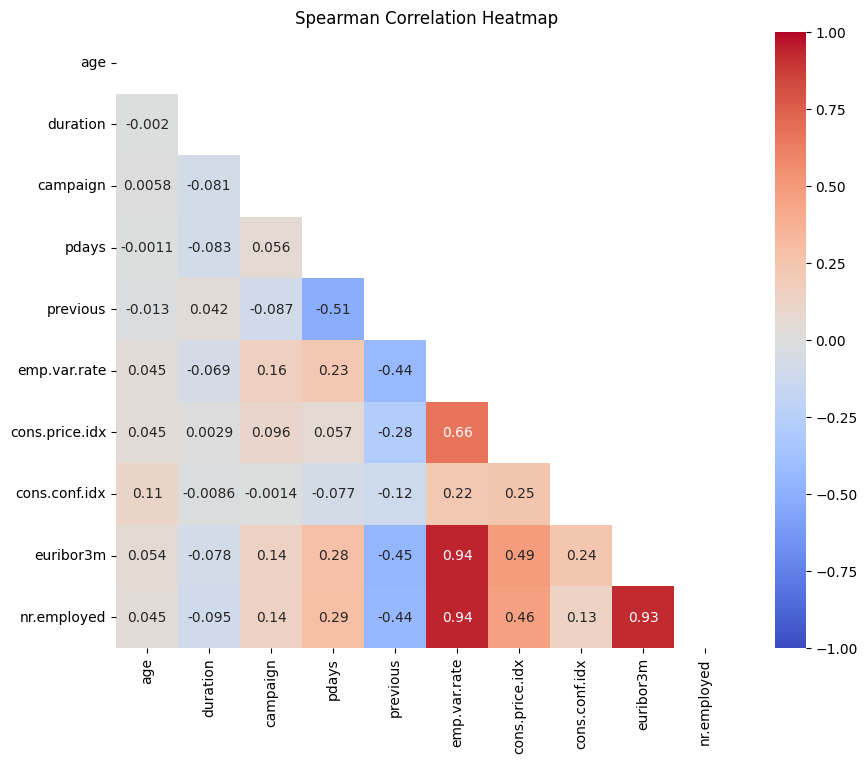

In [354]:
# Spearman correlation test
corr = df[numerical_cols].corr(method='spearman')
mask = np.triu(corr)
# create visualization using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

There are no strong correlation between each numerical features that can cause multicolinearity issue, except :
- `euribor3m` and `emp.var.rate`
- `nr.employed` and `emp.var.rate`
- `nr.employed` and `euribor3m`